<h1><center>Data Bootcamp Final Project</center></h1>
<center>Presented By: Jok Aleu and Zach Xue</center>




### Background:

The year of 2020 was extremely tumultuous. Not just in the social and political aspects of society, but also economically as well. Because of the coronavirus, many corporations within the United States and all around the world experienced financial significant setbacks and changes overall. This led us to wonder what the exactly caused the stock market to increase or decrease, and how that was affected by the coronavirus. We wanted to see what kind of impact US GDP data had on the stock market, and what exactly happened to the stock market in 2020 as a result of the coronavirus. 

### Project Description:

Overall, we want to find the fundamental factors that cause stock market growth. We do this by comparing GDP data, company dividends, and estimated earnings data to stock market data that is clustered by industry sectors. The largest discernable differences between the potential factors and stock market data show us the fundamental patterns/factors for stock market growth.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
%matplotlib inline

### 

### 1. Reading in and Cleaning the Datasets

In [133]:
stock_prices = pd.read_csv('C:/Users/zachx/Documents/Data_Bootcamp/stock_prices_latest.csv')
stock_prices
#This dataset contains a list of all stock prices in the past 20 years for each individual corporation, for each individul date logged.
#It contains values such as the opening price, closing price, stock volume, and split coefficient 

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,5/16/2016,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,1/16/2002,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,9/18/2001,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,10/26/2007,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,6/27/2014,41.61,42.29,41.51,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
1048570,BOKF,10/4/2010,45.09,45.41,44.83,45.00,36.9596,99100,1.0
1048571,BOKF,1/19/2007,52.51,52.66,52.33,52.63,40.2866,31500,1.0
1048572,BOKF,10/6/2011,48.11,48.81,47.16,48.74,40.8965,137700,1.0
1048573,BOKF,4/13/2011,52.19,52.39,51.13,51.13,42.4157,32800,1.0


In [134]:
sp500 = pd.read_csv('sp500.csv')
sp500
#This dataset, taken from Yahoo Finance, indicates the daily open, high, low, and closing prices for the S&P 500 index 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-11,2047.270020,2047.270020,2008.800049,2012.369995,2012.369995,4301060000
1,2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000
2,2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000
3,2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000
4,2015-12-17,2073.760010,2076.370117,2041.660034,2041.890015,2041.890015,4327390000
...,...,...,...,...,...,...,...
1254,2020-12-04,3670.939941,3699.199951,3670.939941,3699.120117,3699.120117,5086370000
1255,2020-12-07,3694.729980,3697.409912,3678.879883,3691.959961,3691.959961,4788560000
1256,2020-12-08,3683.050049,3708.449951,3678.830078,3702.250000,3702.250000,4549670000
1257,2020-12-09,3705.979980,3712.389893,3660.540039,3672.820068,3672.820068,5209940000


In [135]:
nasdaq = pd.read_csv('nasdaq.csv')
nasdaq
#This dataset, taken from Yahoo Finance, indicates the daily open, high, low, and closing prices for the NASDAQ 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-11,4979.770020,4996.189941,4928.669922,4933.470215,4933.470215,2084950000
1,2015-12-14,4932.609863,4953.600098,4871.589844,4952.229980,4952.229980,2216060000
2,2015-12-15,4991.209961,5026.540039,4986.990234,4995.359863,4995.359863,2054710000
3,2015-12-16,5033.479980,5078.990234,4992.629883,5071.129883,5071.129883,2036610000
4,2015-12-17,5087.169922,5088.580078,5002.549805,5002.549805,5002.549805,1897220000
...,...,...,...,...,...,...,...
1254,2020-12-04,12399.320313,12464.230469,12376.440430,12464.230469,12464.230469,5044210000
1255,2020-12-07,12461.000000,12536.230469,12460.549805,12519.950195,12519.950195,4741690000
1256,2020-12-08,12503.169922,12594.540039,12453.209961,12582.769531,12582.769531,4758170000
1257,2020-12-09,12591.690430,12607.139648,12290.780273,12338.950195,12338.950195,5131720000


In [136]:
dowjones = pd.read_csv('dowjones.csv')
dowjones
#This dataset, taken from Yahoo Finance, indicates the daily open, high, low, and closing prices for the Dow Jones Industrial Average 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-11,17574.750000,17574.750000,17230.500000,17265.210938,17265.210938,134510000
1,2015-12-14,17277.109375,17378.019531,17138.470703,17368.500000,17368.500000,142540000
2,2015-12-15,17374.779297,17627.630859,17341.179688,17524.910156,17524.910156,123430000
3,2015-12-16,17530.849609,17784.359375,17483.679688,17749.089844,17749.089844,123790000
4,2015-12-17,17756.539063,17796.759766,17493.500000,17495.839844,17495.839844,115780000
...,...,...,...,...,...,...,...
1254,2020-12-04,29989.560547,30218.259766,29989.560547,30218.259766,30218.259766,356590000
1255,2020-12-07,30233.029297,30233.029297,29967.220703,30069.789063,30069.789063,365810000
1256,2020-12-08,29997.949219,30246.220703,29972.070313,30173.880859,30173.880859,311190000
1257,2020-12-09,30229.810547,30319.699219,29951.849609,30068.810547,30068.810547,380520000


##### (Zach) 

I created a dataset that calculated the percent change between the quarters for 5 years for the Dow Jones Industrial Average. For each quarter, as shown below, there is a corresponding "return" column observation that indicates the percent change in closing prices between the previous quarter and this quarter.

In [132]:
dowjones_returns = pd.read_excel('dowjones_returns.xlsx')
dowjones_returns.columns = dowjones_returns.columns.str.lower()
dowjones_returns

,quarter,return
0,2016 Q1,0.0794
1,2016 Q2,0.0371
2,2016 Q3,-0.0157
3,2016 Q4,0.0949
4,2017 Q1,0.0542
5,2017 Q2,0.0454
6,2017 Q3,0.0679
7,2017 Q4,0.1186
8,2018 Q1,-0.0760
9,2018 Q2,0.0518


In [137]:
earnings = pd.read_csv('earnings_latest.csv')
earnings = earnings.dropna()
earnings
#This dataset contains the earnings data for all stocks in the past 20 years --> this includes the estimated earnings per share rate, the earnings per share rate, and the release time

,symbol,date,qtr,eps_est,eps,release_time
14,A,2012-11-19,10/2012,0.800,0.84,post
15,A,2013-02-14,01/2013,0.660,0.63,post
16,A,2013-05-14,04/2013,0.670,0.77,post
17,A,2013-08-14,07/2013,0.620,0.68,post
18,A,2013-11-14,10/2013,0.760,0.81,post
...,...,...,...,...,...,...
160655,ZYXI,2019-10-29,Q3,0.057,0.06,post
160656,ZYXI,2020-02-27,Q4,0.077,0.09,post
160657,ZYXI,2020-04-28,Q1,0.063,0.09,post
160658,ZYXI,2020-07-28,Q2,0.086,0.09,post


In [138]:
dividends = pd.read_csv('dividends_latest.csv')
dividends = dividends.dropna()
dividends
#This dataset contains the dividends data for all stocks in the past 20 years

,symbol,date,dividend
0,MSFT,2016-11-15,0.3900
1,MSFT,2011-05-17,0.1600
2,MSFT,2008-05-13,0.1100
3,MSFT,2011-02-15,0.1600
4,MSFT,2012-02-14,0.2000
...,...,...,...
250144,EBTC,2020-11-09,0.1750
250145,EFAS,2020-11-04,0.0525
250146,EFBI,2020-11-12,0.0500
250147,CDL,2020-11-12,0.1111


##### (Zach)

- I created a dataset that calculated the percent change in US GDP, based on the original gross_output dataset. Here, for the periods of 2018-2020, I found the percent change in US GDP for each individual industry sector. 


- To clean this dataset, I manually added in the column labels for the quarters. I also transposed the dataset so that the quarter values would be able to merge successfully onto other quarter values. I dropped one of the obsolete 'Quarter' columns from the dataset, and reset the index so that the quarter column wasn't an index variable. 

In [131]:
gross_output_returns = pd.read_excel('gross_output_returns.xlsx')
gross_output_returns.columns = ['Quarter', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']
gross_output_returns  = gross_output_returns.T
gross_output_returns.columns = gross_output_returns.iloc[0]
gross_output_returns = gross_output_returns.drop('Quarter')
gross_output_returns = gross_output_returns.reset_index()
gross_output_returns = gross_output_returns.rename(columns={'index':'quarter'})
gross_output_returns

Quarter,quarter,All industries,Private industries,"Agriculture, forestry, fishing, and hunting",Farms,"Forestry, fishing, and related activities",Mining,Oil and gas extraction,"Mining, except oil and gas",Support activities for mining,Utilities,Construction,Manufacturing,Durable goods,Wood products,Nonmetallic mineral products,Primary metals,Fabricated metal products,Machinery,Computer and electronic products,"Electrical equipment, appliances, and components","Motor vehicles, bodies and trailers, and parts",Other transportation equipment,Furniture and related products,Miscellaneous manufacturing,Nondurable goods,Food and beverage and tobacco products,Textile mills and textile product mills,Apparel and leather and allied products,Paper products,Printing and related support activities,Petroleum and coal products,Chemical products,Plastics and rubber products,Wholesale trade,Retail trade,Motor vehicle and parts dealers,Food and beverage stores,General merchandise stores,Other retail,Transportation and warehousing,Air transportation,Rail transportation,Water transportation,Truck transportation,Transit and ground passenger transportation,Pipeline transportation,Other transportation and support activities,Warehousing and storage,Information,"Publishing industries, except internet (includes software)",Motion picture and sound recording industries,Broadcasting and telecommunications,"Data processing, internet publishing, and other information services","Finance, insurance, real estate, rental, and leasing",Finance and insurance,"Federal Reserve banks, credit intermediation, and related activities","Securities, commodity contracts, and investments",Insurance carriers and related activities,"Funds, trusts, and other financial vehicles",Real estate and rental and leasing,Real estate,Housing,Other real estate,Rental and leasing services and lessors of intangible assets,Professional and business services,"Professional, scientific, and technical services",Legal services,Computer systems design and related services,"Miscellaneous professional, scientific, and technical services",Management of companies and enterprises,Administrative and waste management services,Administrative and support services,Waste management and remediation services,"Educational services, health care, and social assistance",Educational services,Health care and social assistance,Ambulatory health care services,Hospitals,Nursing and residential care facilities,Social assistance,"Arts, entertainment, recreation, accommodation, and food services","Arts, entertainment, and recreation","Performing arts, spectator sports, museums, and related activities","Amusements, gambling, and recreation industries",Accommodation and food services,Accommodation,Food services and drinking places,"Other services, except government",Government,Federal,General government,National defense,Nondefense,Government enterprises,State and local,General government,Government enterprises,Private goods-producing industries1,Private services-producing industries2
0,2018 Q2,0.0171435,0.0176794,0.00831328,0.00972326,-0.00178571,0.0535059,0.06299,0.0341644,0.0395299,0.0106921,0.0233189,0.0162228,0.0178782,0.0083612,0.0269231,0.0566038,0.0228199,0.0388522,0.0211669,0.028147,0.0136854,-0.0385521,0.00647668,0.0220764,0.0145413,0.00136268,0.00606061,0.0154639,0.00374732,0.024447,0.0280533,0.020386,0.0177539,0.0221208,0.0169234,0.0246875,0.003276,0.0167084,0.0178846,0.0270422,0.029042,0.0289157,0.0394477,0.0239065,0.039779,0.0238095,0.0242881,0.0253731,0.0195616,0.0128815,0.0350765,0.00461787,0.0516291,0.0114308,0.00682046,0.0118866,-0.0103252,0.0138518,-0.00752823,0.0150043,0.0138491,0.0101484,0.0201172,0.0260917,0.0188081,0.0217714,0.0408163,0.0330011,0.0138015,0,0.0233891,0.0270101,-0.00946074,0.0112146,0.00681013,0.0119076,0.00458211,0.0178261,0.0199681,0.0134321,0.027581,0.0370052,0.0822281,-0.015625,0.0246451,0.0395644,0.0196589,0.0268093,0.0127561,0.0156143,0.0173394,0.0221568,0.00982916,-0.00322928,0.011

To clean the gross_output dataset, I skipped the first 5 rows and the last 6 rows, while setting the index to be the industries column. Then, I manually added in column labels.

In [139]:
gross_output = pd.read_csv('gross_output.csv', skiprows=5, skipfooter=6, index_col=1)
gross_output = gross_output.dropna()
gross_output = gross_output.drop('Line', axis=1)
gross_output.columns = ['2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']
gross_output

<ipython-input-139-0c16db8932ff>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gross_output = pd.read_csv('gross_output.csv', skiprows=5, skipfooter=6, index_col=1)


,2018 Q1,2018 Q2,2018 Q3,2018 Q4,2019 Q1,2019 Q2,2019 Q3,2019 Q4,2020 Q1,2020 Q2
All industries,35838.6,36453.0,36916.7,37205.3,37377.9,37709.1,37991.1,38189.9,37826.8,34260.0
Private industries,31958.1,32523.1,32940.9,33195.7,33349.6,33632.4,33887.0,34052.5,33685.4,30215.1
"Agriculture, forestry, fishing, and hunting",457.1,460.9,449.9,454.8,447.0,448.4,453.0,461.3,467.7,416.6
Farms,401.1,405.0,395.8,400.9,392.3,394.1,399.1,405.9,413.1,367.9
"Forestry, fishing, and related activities",56.0,55.9,54.1,53.8,54.6,54.2,53.9,55.4,54.6,48.7
...,...,...,...,...,...,...,...,...,...,...
State and local,2714.9,2746.1,2777.9,2801.7,2807.4,2834.8,2852.6,2873.0,2872.7,2727.0
General government,2360.1,2388.0,2417.1,2437.2,2440.6,2463.4,2479.0,2497.9,2499.9,2380.9
Government enterprises,354.8,358.2,360.9,364.5,366.8,371.4,373.5,375.1,372.8,346.0
Private goods-producing industries1,8721.7,8892.3,9029.4,9031.1,8989.1,9010.3,8966.9,8960.0,8869.9,7789.0


In [140]:
gross_output['2019'] = gross_output['2019 Q1'] + gross_output['2019 Q2'] + gross_output['2019 Q3'] + gross_output['2019 Q4']
gross_output['2020'] = gross_output['2020 Q1'] + gross_output['2020 Q2']
#Here, I simplified the quarterly data by adding up all the quarterly GDP data into one yearly GDP column for each respective year

In [142]:
gross_output_2019 = gross_output.groupby(gross_output.index)['2019'].mean().head(30)
gross_output_2020 = gross_output.groupby(gross_output.index)['2020'].mean().head(30)
#I created two new dataframes that take in the index of the gross_output dataframe, the industries, as the new index
#Then, I grouped the index by the new yearly columns that I just created
#I only want to look at the Top 30 industries in the US GDP dataset, as the others have GDP values that are not relevant to this analysis

### 

### 2. Time Series Graphs of Stock Market Data (By Popular Market Indices)

- From the S&P 500, NASDAQ, and Dow Jones datasets, I created dataframes differentiated by year (2019 vs 2020) that compared the indices closing prices for each day. 


- Following this, using matplotlib, I created line plots with each line representing a different index for 2019 and 2020 data

In [14]:
sp500_2019 = sp500.loc[sp500['Date'].str.contains('2019')].groupby('Date', as_index=False)['Close'].mean()
sp500_2019 = sp500_2019.set_index('Date')

sp500_2020 = sp500.loc[sp500['Date'].str.contains('2020')].groupby('Date', as_index=False)['Close'].mean()
sp500_2020 = sp500_2020.set_index('Date')

In [15]:
nasdaq_2019 = nasdaq.loc[nasdaq['Date'].str.contains('2019')].groupby('Date', as_index=False)['Close'].mean()
nasdaq_2019 = nasdaq_2019.set_index('Date')

nasdaq_2020 = nasdaq.loc[nasdaq['Date'].str.contains('2020')].groupby('Date', as_index=False)['Close'].mean()
nasdaq_2020 = nasdaq_2020.set_index('Date')

In [16]:
dowjones_2019 = dowjones.loc[dowjones['Date'].str.contains('2019')].groupby('Date', as_index=False)['Close'].mean()
dowjones_2019 = dowjones_2019.set_index('Date')

dowjones_2020 = dowjones.loc[dowjones['Date'].str.contains('2020')].groupby('Date', as_index=False)['Close'].mean()
dowjones_2020 = dowjones_2020.set_index('Date')

In [148]:
plt.style.use('fivethirtyeight')

C:\Users\zachx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\zachx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


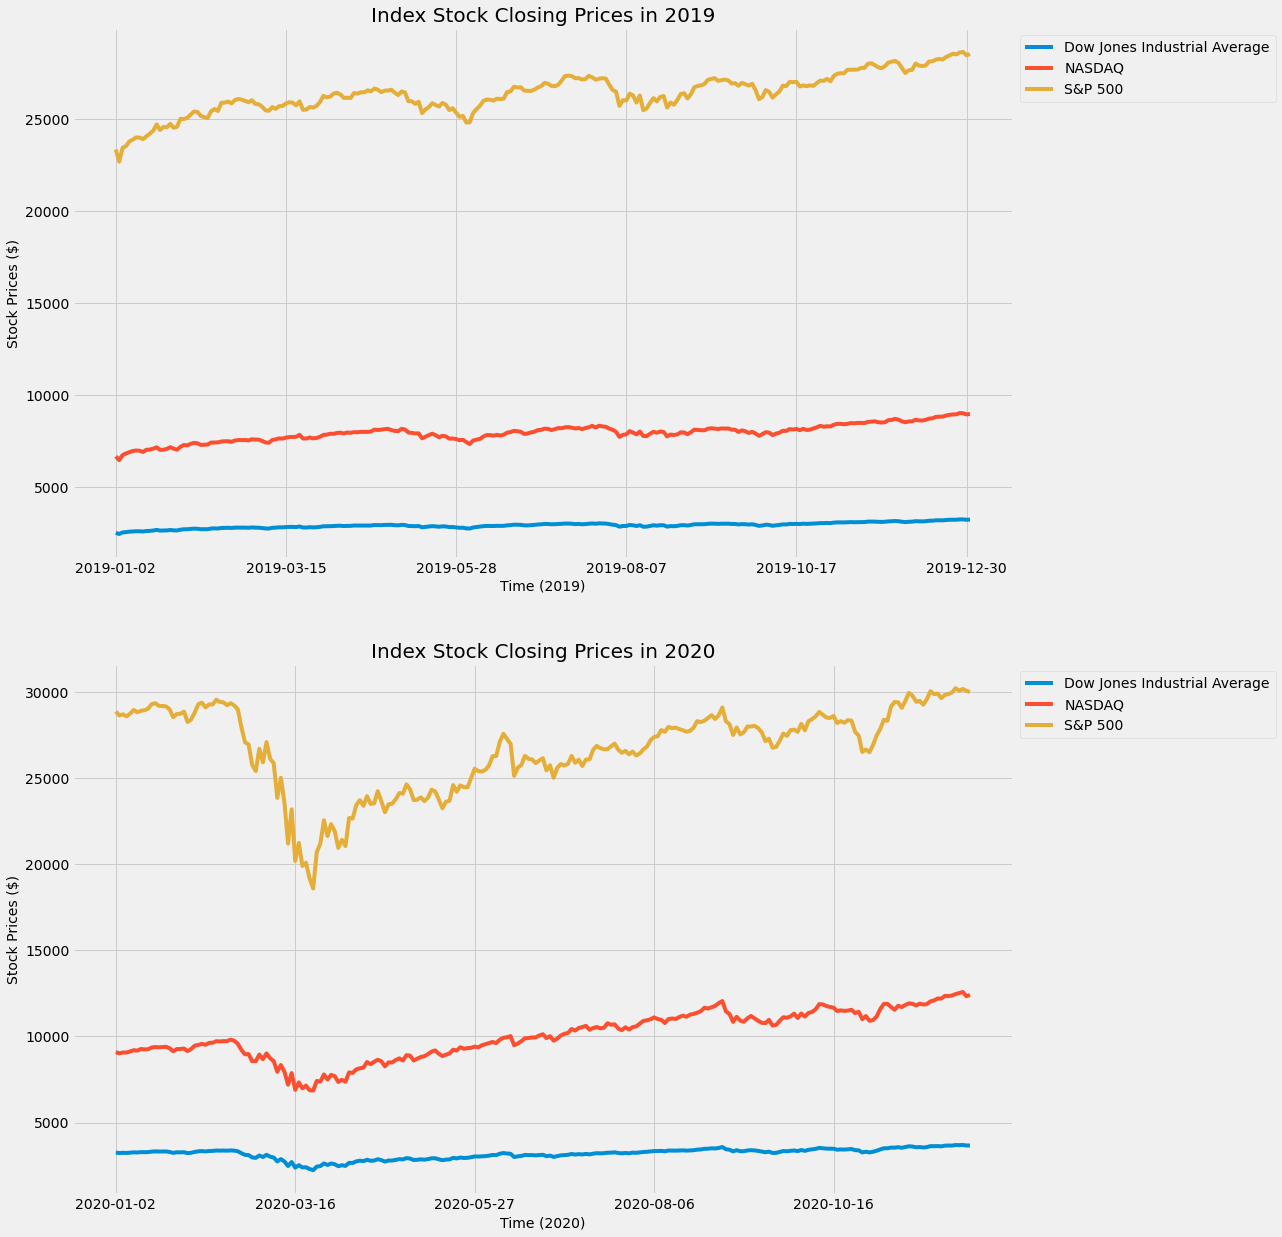

In [150]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sp500_2019.plot(ax=ax[0], figsize=(15,20))
nasdaq_2019.plot(ax=ax[0])
dowjones_2019.plot(ax=ax[0])
#Plots all three lines on the same plot

sp500_2020.plot(ax=ax[1])
nasdaq_2020.plot(ax=ax[1])
dowjones_2020.plot(ax=ax[1])
#Plots all three lines on the next plot

ax[0].set_title('Index Stock Closing Prices in 2019', fontsize=20)
ax[0].set_ylabel('Stock Prices ($)', fontsize=14)
ax[0].set_xlabel('Time (2019)', fontsize=14)

ax[1].set_title('Index Stock Closing Prices in 2020', fontsize=20)
ax[1].set_ylabel('Stock Prices ($)', fontsize=14)
ax[1].set_xlabel('Time (2020)', fontsize=14)

ax[0].legend({'S&P 500', 'NASDAQ', 'Dow Jones Industrial Average'}, bbox_to_anchor=(1,1))
ax[1].legend({'S&P 500', 'NASDAQ', 'Dow Jones Industrial Average'}, bbox_to_anchor=(1,1))

#### Explanation and Analysis:

- In 2019, all of the popular indices looks to be relatively stable throughout most of the year. The S&P 500 looks to fluctuate more than either the NASDAQ or the Dow. But, overall, performance seems to be consistently rising throughout 2019. The S&P's fluctuations might be because many of the Top 500 companies listed on that index are technology companies. These companies tend to have more price fluctation than others because of constantly shifting innovations within the industry. New developments and product announcements can drastically affect the price of the stock on a daily, weekly, or monthly basis. Looking at the NASDAQ and the Dow, the NASDAQ tends to vary more than the Dow. This might be because it simply contains more companies in its index when compared to the Dow's 30 companies. 


- In 2020, there was a significant drop in stock prices for all three indices during the end of Q1 and the beginning of Q2 2020. This likely was because of the introduction of coronavirus and the worldwide pandemic as a whole. In addition, the pandemic also ushered in the state of mandatory quarantines and stay-at-home orders, which looks to have drastically affected stock prices. Particually, the S&P 500 looks to have fallen the most during this period. Again, this could be due to the large amount of technology companies present with the S&P. The impact of coronavirus cannot be understated. Many companies in the S&P that specialize in outdoors entertainment, like carnivals or cruises, lost significant amount of market share during the beginning of Q2 2020. Interestingly enough, the Dow and NASDAQ took a significantly smaller hit than the S&P. This might be because of the Federal reserve's massive influx of monetary stimulus, allowing the stock market to rebound after the initial events of the coronavirus. However, the fluctuations in the data still remain to this day, starkly different than the relative stability present in the 2019 data. 


- This data shows us that coronavirus had a fundamental impact on the stock market, especially when compared 2019 vs. 2020 data. If stock market data fluctuated and changed this much between these specific time periods, what does that mean for GDP data? Are specific industries now far different than they were in the previous years?  

### 

### 3. Comparison of GDP Data By Sector (2019 vs. 2020)

- For the gross_output datasets, I removed the rows: Private industries, all industries, etc, as they do not provide adequate or relevant information about the specific industries that I want to investigate. 

Text(0, 0.5, 'US Industries')

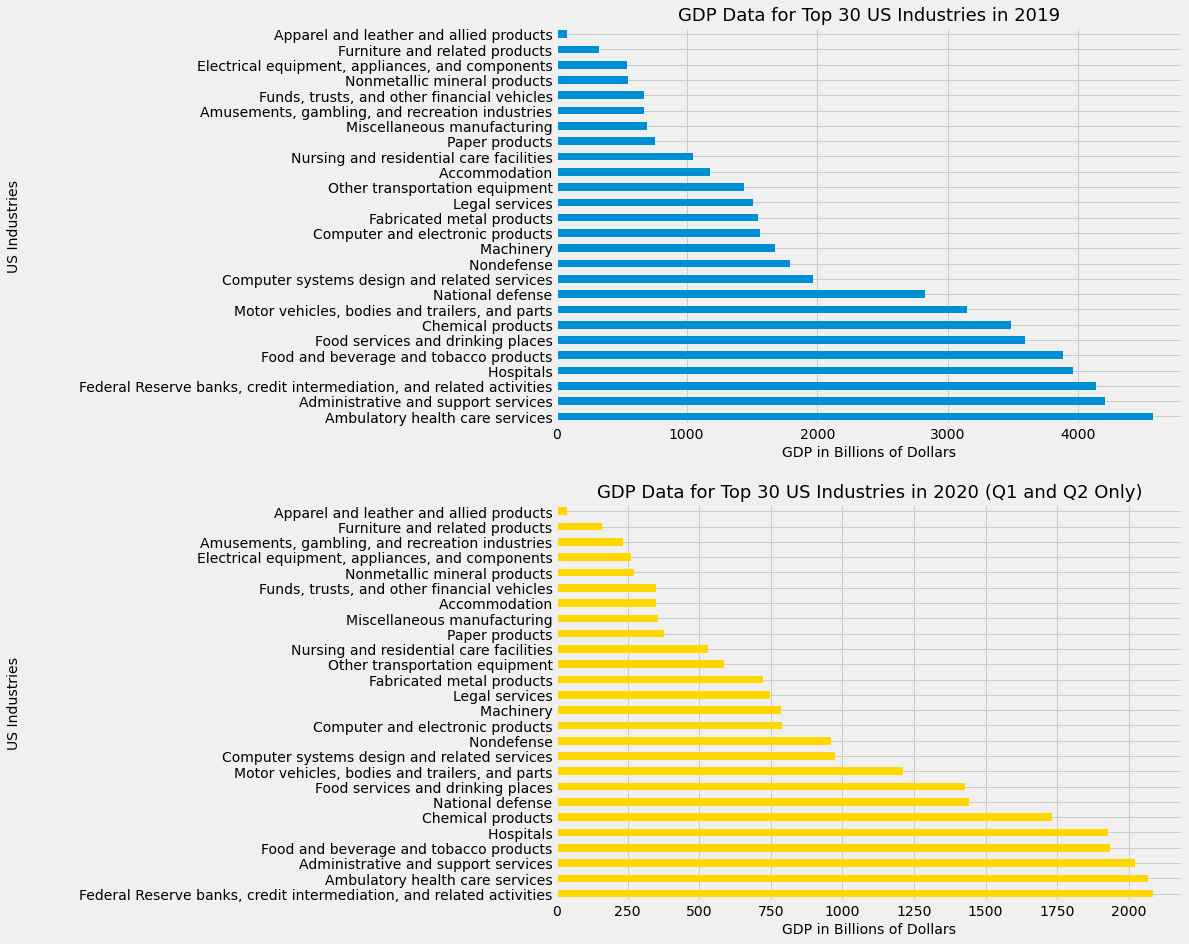

In [151]:
fig, ax = plt.subplots(nrows=2, ncols=1)

gross_output_2019.sort_values(ascending=False).iloc[4:].plot.barh(ax=ax[0], figsize=(10,15))
gross_output_2020.sort_values(ascending=False).iloc[4:].plot.barh(ax=ax[1], color='gold')

ax[0].set_title('GDP Data for Top 30 US Industries in 2019', fontsize=18)
ax[0].set_xlabel('GDP in Billions of Dollars', fontsize=14)
ax[0].set_ylabel('US Industries', fontsize=14)

ax[1].set_title('GDP Data for Top 30 US Industries in 2020 (Q1 and Q2 Only)', fontsize=18)
ax[1].set_xlabel('GDP in Billions of Dollars', fontsize=14)
ax[1].set_ylabel('US Industries', fontsize=14)

#### Explanation and Analysis

- Because the 2020 GDP data only includes values for Q1 and Q2 2020, it is roughly half the value of 2019 GDP data


- The 2019 GDP data lists ambulatory health services as the highest gross output in billions of dollars for all quarters of 2019. This is closely followed by administrative and support services and Federal Reserve banks, and hospitals. Because of the United States health care system, none of this is particularly surprising. However, the 2020 data suggests a difference so far. The Federal Reserve banks, credit intermediation and related activities actually had the highest gross output so far This is likely because of the Federal Reserve's stimulus packages that helped the stock market and the overall economy (in the form of GDP) rebound after the initial outbreak of coronavirus. In addition, sectors such as motor vehicles are relatively lower in 2020. This might be because of the nationwide lockdowns and quarantines that are keeping people from moving about too much, especially by motor vehicles, for the time being. 


- By looking at this comparison of GDP data, we can see that specific industries/sectors such as federal reserve and motor vehicles, differ in their GDP values. Compared to the economic downturn of the stock market, particularly for the federal reserve sector, it's understandable how the two metrics (GDP data and stock market data) would be correlated, or at least have an observable effect on each other.

### 

### 4. Regression Analysis of Potential Stock Market Growth Factors against Stock Market Growth

- For this section, we decided to examine the impact of the estimated earnings per shares and the dividends on the stock closing price for 2020.  

In [143]:
from sklearn.linear_model import LinearRegression as linreg
#Importing the linear regression package from scikit learn

In [144]:
earnings_stocks = pd.merge(earnings, stock_prices, on='symbol', how='inner')
#Merging the two datasets: earnings data and stock prices data into one, on the symbol column

In [145]:
earnings_stocks_2020 = earnings_stocks[earnings_stocks['date_x'].str.contains('2020')]
del earnings_stocks_2020['date_y']
earnings_stocks_2020 = earnings_stocks_2020.rename({'date_x': 'date'}, axis=1)
earnings_stocks_2020

#Forming a new dataframe that only takes in values for 2020 stock data
#Dropping the redundant date_y column, as there already exists a date column that

,symbol,date,qtr,eps_est,eps,release_time,open,high,low,close,close_adjusted,volume,split_coefficient
159132,AAOI,2020-02-27,Q4,-0.234,-0.18,post,25.85,25.85,24.8500,25.150,25.15,559407,1.0
159133,AAOI,2020-02-27,Q4,-0.234,-0.18,post,18.41,18.46,17.4300,18.420,18.42,209842,1.0
159134,AAOI,2020-02-27,Q4,-0.234,-0.18,post,22.10,22.42,21.6910,22.330,22.33,194600,1.0
159135,AAOI,2020-02-27,Q4,-0.234,-0.18,post,24.49,24.96,24.2300,24.740,24.74,148631,1.0
159136,AAOI,2020-02-27,Q4,-0.234,-0.18,post,12.93,13.13,12.5600,12.980,12.98,293629,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15187200,BMRA,2020-10-15,Q1,-0.080,-0.14,post,0.70,0.70,0.7000,0.700,175.00,0,1.0
15187201,BMRA,2020-10-15,Q1,-0.080,-0.14,post,3.75,3.75,3.2813,3.375,843.75,100,1.0
15187202,BMRA,2020-10-15,Q1,-0.080,-0.14,post,0.43,0.43,0.4300,0.430,107.50,0,1.0
15187203,BMRA,2020-10-15,Q1,-0.080,-0.14,post,0.45,0.45,0.4500,0.450,112.50,0,1.0


#### 4a. Running the Regression

In [153]:
reg = linreg().fit(earnings_stocks_2020[['eps_est']], earnings_stocks_2020['close'])
#Creating the regression variable to fit the estimated earnings per shares with the stock closing price

In [154]:
earnings_stocks_2020['yhat'] = reg.predict(earnings_stocks_2020[['eps_est']])
#Creating the yhat regression line that will be plotted along with the scatter plot of the data

Text(0.5, 0, 'Earnings per Share Estimate (EPS Estimate)')

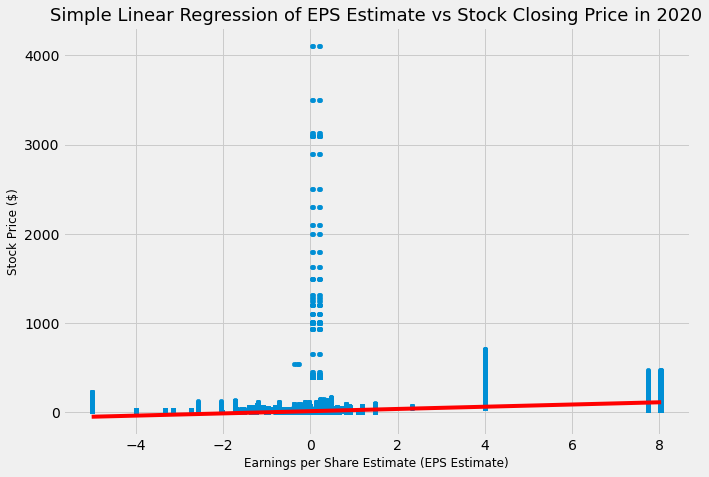

In [156]:
fig, ax = plt.subplots()

earnings_stocks_2020.plot.scatter(x='eps_est', y='close', ax=ax)
earnings_stocks_2020.sort_values('eps_est').set_index('eps_est')['yhat'].plot(color = 'red', linewidth=4, figsize=(10,7), ax=ax)
#Creating the scatterplot for the data, with the index set to estimated earnings per share

ax.set_title('Simple Linear Regression of EPS Estimate vs Stock Closing Price in 2020', fontsize=18)
ax.set_ylabel('Stock Price ($)', fontsize=12)
ax.set_xlabel('Earnings per Share Estimate (EPS Estimate)', fontsize=12)

In [370]:
earnings_stocks_2020[['eps_est', 'close']].corr()
#Correlation coefficient between estimated earnings per share and stock closing price

,eps_est,close
eps_est,1.000000,0.395993
close,0.395993,1.000000


In [146]:
reg1 = smf.ols('eps_est ~ close', data=earnings_stocks_2020).fit()
print(reg1.summary())
#OLS Regression with summary statistics

                            OLS Regression Results                            
Dep. Variable:                eps_est   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                 1.340e+05
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:03:41   Log-Likelihood:            -1.2213e+06
No. Observations:              720507   AIC:                         2.443e+06
Df Residuals:                  720505   BIC:                         2.443e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0815      0.002    -49.632      0.0

#### Explanation and Analysis

- Looking at the data on the scatter plot, there seems to be quite the number of outliers around an x value near zero earnings per share. Earnings per share is supposed to be representative of a company's profitability, so it is a little bit unusual to see such high stock closing prices in comparison to an almost zero earnings per share value. Thus, we can conclude that these values are outliers towards the regression analysis, and we cannot factor that into our conclusions


- The general understanding of the regression analysis seems to be that when earnings per share increases, so does the company's stock price. From the definition of earnings per share, this is understandable. However, the R^2 value of 0.157, as stated in the statistical summary data above, means that the model can only explain 15.7% of the variation in y. The correlation coefficient is also only 39.59%. The p value is also at 0.0, meaning that these values most likely did not occur just due to chance. This allows us to conclude that earnings per share is not a fundamental factor for predicting stock market growth. 


- This is not to say that earnings per share isn't a factor for predicting stock market growth entirely. Earnings per share is a widely used metric for showing how much money a company makes for each share of its stock, showcasing corporate value. While companies may have a low EPS, their stock price can be high because stock price by itself isn't the only indicator for a company's value. The nature of the variables lend variability towards this analysis. 

### 

In [107]:
dividends_stocks = pd.merge(dividends, stock_prices, on='symbol', how='inner')
#Reading in a merged dataframe of the dividends dataset and the stock prices dataset

In [108]:
dividends_stocks_2020 = dividends_stocks[dividends_stocks['date_x'].str.contains('2020')]
del dividends_stocks_2020['date_y']
dividends_stocks_2020 = dividends_stocks_2020.rename({'date_x': 'date'}, axis=1)
dividends_stocks_2020

#Creating a new dataframe for dividends only in 2020
#Removing the excess date_y column from the new merged dataframe

,symbol,date,dividend,open,high,low,close,close_adjusted,volume,split_coefficient
290816,MSFT,2020-02-19,0.51,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
290817,MSFT,2020-02-19,0.51,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
290818,MSFT,2020-02-19,0.51,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
290819,MSFT,2020-02-19,0.51,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
290820,MSFT,2020-02-19,0.51,41.61,42.29,41.51,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...,...
23970812,AOBC,2020-09-16,0.05,0.78,0.81,0.69,0.69,0.6900,225200,1.0
23970813,AOBC,2020-09-16,0.05,1.75,1.78,1.70,1.78,1.7800,5300,1.0
23970814,AOBC,2020-09-16,0.05,1.45,1.45,1.35,1.42,1.4200,31500,1.0
23970815,AOBC,2020-09-16,0.05,3.88,3.93,3.87,3.92,3.9200,447900,1.0


### 

In [157]:
reg2 = linreg().fit(dividends_stocks_2020[['dividend']], dividends_stocks_2020['close'])
#Creating the regression variable to fit the dividends with the stock closing price

In [158]:
dividends_stocks_2020['yhat'] = reg2.predict(dividends_stocks_2020[['dividend']])
#Creating the yhat regression line that will be fit to the scatter plot

Text(0.5, 0, 'Dividends (%)')

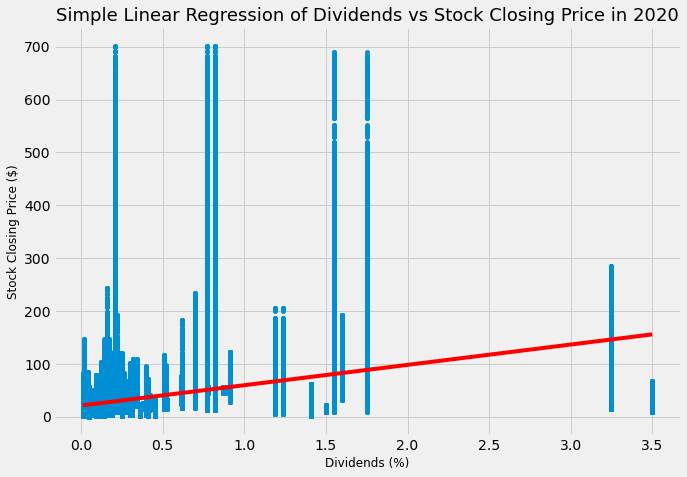

In [196]:
fig, ax = plt.subplots()

dividends_stocks_2020.plot.scatter(x='dividend', y='close', ax=ax)
dividends_stocks_2020.sort_values('dividend').set_index('dividend')['yhat'].plot(color = 'red', linewidth=4, figsize=(10,7), ax=ax)

ax.set_title('Simple Linear Regression of Dividends vs Stock Closing Price in 2020', fontsize=18)
ax.set_ylabel('Stock Closing Price ($)', fontsize=12)
ax.set_xlabel('Dividends (%)', fontsize=12)

In [384]:
dividends_stocks_2020[['dividend', 'close']].corr()
#Correlation coefficient between dividends and stock closing price

,dividend,close
dividend,1.000000,0.380043
close,0.380043,1.000000


In [147]:
reg3 = smf.ols('dividend ~ close', data=dividends_stocks_2020).fit()
print(reg3.summary())
#OLS Regression summary 

                            OLS Regression Results                            
Dep. Variable:               dividend   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                 1.544e+05
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:41:30   Log-Likelihood:            -5.1367e+05
No. Observations:              914632   AIC:                         1.027e+06
Df Residuals:                  914630   BIC:                         1.027e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1998      0.001    363.661      0.0

#### Explanation and Analysis

- Looking at the graph, there seems to be quite a large number of outliers in the data. There are many stocks that have small dividend percentages and large stock prices. This could be due to the fact that not all companies pay dividends. Instead of divulging it to shareholders, some choose to keep that money as retained earnings. As such, they have relatively smaller dividend percentages. However, this can make the analysis a bit ambiguous. 


- Currently, the regression analysis states that as dividend percentages increase, the resulting stock closing price also increases. This is represented by the correlation coefficient of 38% correlation. However, the R^2 value for this relationship: 0.144, indicates that the model can only explain 14.4% of the variation in y. Although there is a slight positive relationship between these two variables, it is not significant enough to make company dividends a reliable and fundamental factor for stock market growth. 


- However, dividend percentages are still a decent indicator for stock market growth, just not a fundamental factor. Just like the earnings per share estimate, there is some correlation between the two variables and stock closing price. 

### 

### 5. Regression Analysis of GDP Growth vs Stock Market Growth

In [161]:
dj_gdp = pd.merge(gross_output_returns, dowjones_returns, on='quarter', how='left')
#Creating a new dataframe that merges the gross output percent change dataset and the percent change dataset for the dow jones. 

In [162]:
dj_gdp.columns = dj_gdp.columns.str.replace(' ', '')
#Deleting the excess spaces in the column names 

In [163]:
gross_output_returns = gross_output_returns.apply(pd.to_numeric, errors='ignore')
#Converting all accessible values to floats

In [164]:
dj_gdp['Return'] = [0.0518, -0.0118, -0.0046, 0.0637, 0.0102, 0.0068, 0.0447, -0.1384, 0.0855]
#The return column that was merged into the gross output returns dataframe kept returning NaN values, so I elected to 
#manually create a new column with the same return data as the original dataset

In [165]:
pd.set_option('display.max_columns', None)
#Makes it easier to see all columns in the dataset; not truncated

### 

In [166]:
from sklearn.linear_model import LinearRegression as linreg

In [167]:
reg_gdp = linreg().fit(dj_gdp[['Manufacturing']], dj_gdp['Return'])
#Creating the regression function for the Manufacturing sector of the US economy 

In [168]:
dj_gdp['yhat_manu'] = reg_gdp.predict(dj_gdp[['Manufacturing']])
#Creating the yhat regression line that will be fit onto the scatter plot 

Text(0.5, 0, 'Manufacturing GDP % Change')

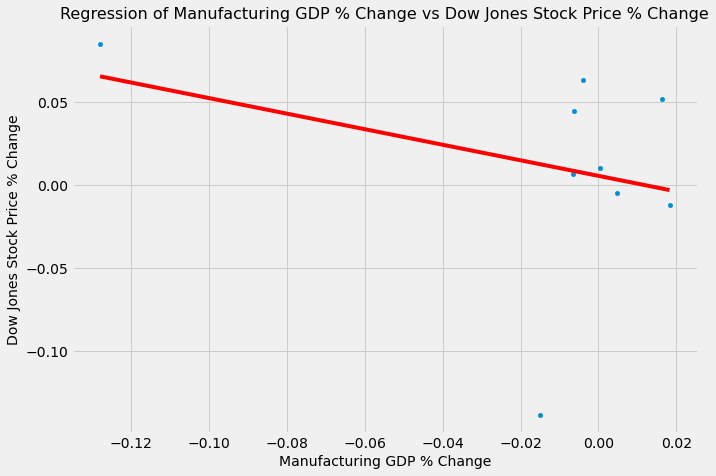

In [195]:
fig, ax = plt.subplots()

dj_gdp.plot.scatter(x='Manufacturing', y='Return', ax=ax)
dj_gdp.sort_values('Manufacturing').set_index('Manufacturing')['yhat_manu'].plot(color = 'red', linewidth=4, figsize=(10,7), ax=ax)

ax.set_title('Regression of Manufacturing GDP % Change vs Dow Jones Stock Price % Change', fontsize=16)
ax.set_ylabel('Dow Jones Stock Price % Change', fontsize=14)
ax.set_xlabel('Manufacturing GDP % Change', fontsize=14)

In [170]:
reg_gdp.score(X = dj_gdp[['Manufacturing']], y = dj_gdp['Return'])

0.10109117735834694

#### Explanation and Analysis:

- Here, the graph shows a slight negative relationship between the percent change in manufacturing gdp and the percent change in the dow jones stock prices. This shows us that as manufacturing gdp increases, the dow jones gdp should decrease respectively. However, this data is not exactly significant because the R^2 value is only 0.101, which means that only 10.1% of the variation in y can be explained by the model. 


- However, this data shows us that the manufacturing sector/industry exhibits an inverse relationship with the Dow Jones index's stock prices. This could be because the manufacturing sector is not accuruately or well represented within the Dow, or that the manufacturing sector is being overshadowed by all the technology/finance industries that are consistently innovating and developing new products. 


- More data points are required in order to reach a more conclusive assessment. 

### 

In [171]:
reg_gdp1 = linreg().fit(dj_gdp[['Information']], dj_gdp['Return'])
#Creating the regression function for the dow jones gdp percent change for the Information sector and the stock price percent change

In [172]:
dj_gdp['yhat_info'] = reg_gdp1.predict(dj_gdp[['Information']])
#Creating the yhat regression line to be fit in a scatter plot 

Text(0.5, 0, 'Information GDP % Change')

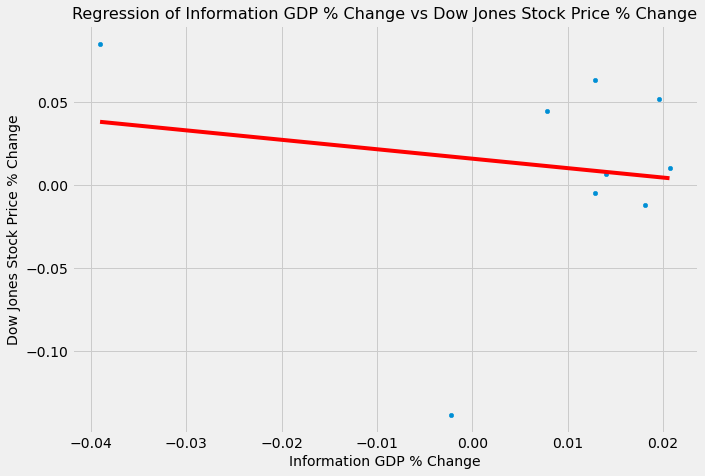

In [194]:
fig, ax = plt.subplots()

dj_gdp.plot.scatter(x='Information', y='Return', ax=ax)
dj_gdp.sort_values('Information').set_index('Information')['yhat_info'].plot(color = 'red', linewidth=4, figsize=(10,7), ax=ax)

ax.set_title('Regression of Information GDP % Change vs Dow Jones Stock Price % Change', fontsize=16)
ax.set_ylabel('Dow Jones Stock Price % Change', fontsize=14)
ax.set_xlabel('Information GDP % Change', fontsize=14)

In [174]:
reg_gdp1.score(X = dj_gdp[['Information']], y = dj_gdp['Return'])

0.026478919735641093

#### Explanation and Analysis:

- Here, the graph shows a slight negative relationship between the Information sector's GDP percent change and the Dow's stock price percent change, from quarter to quartern. This analysis shows us that as the information sector's GDP rises, the Dow's stock prices decrease. This is very similar to the analysis from the manufacturing sector shown above. 


- Overall, because of the R^2 value of 0.0264, only 2.64% of the variaition in the y variable can be explained by the model. This means that the information sector's GDP data is not a reliable or fundamental indicator of stock market growth. Although, there is still a slight downward trend as present from the regression data. 


- Again, this might be because the information sector is being overshadowed by other sectors in the Dow, or that there simply are not enough data points in order to make a reliable conclusion.

### 

In [197]:
reg_gdp2 = linreg().fit(dj_gdp[['Machinery']], dj_gdp['Return'])
#Creating the regression function for the machinery sector's GDP percent change and the Dow's stock price percent change

In [198]:
dj_gdp['yhat_mach'] = reg_gdp2.predict(dj_gdp[['Machinery']])
#Creating the yhat line that will be fit to the scatter plot 

Text(0.5, 0, 'Machinery GDP % Change')

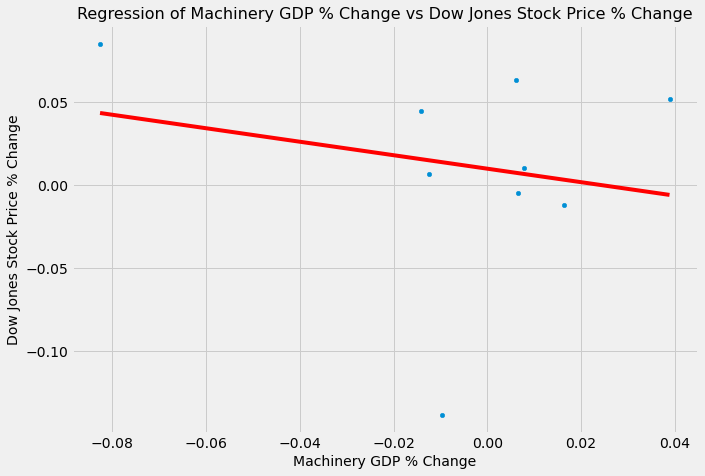

In [193]:
fig, ax = plt.subplots()

dj_gdp.plot.scatter(x='Machinery', y='Return', ax=ax)
dj_gdp.sort_values('Machinery').set_index('Machinery')['yhat_mach'].plot(color = 'red', linewidth=4, figsize=(10,7), ax=ax)

ax.set_title('Regression of Machinery GDP % Change vs Dow Jones Stock Price % Change', fontsize=16)
ax.set_ylabel('Dow Jones Stock Price % Change', fontsize=14)
ax.set_xlabel('Machinery GDP % Change', fontsize=14)

In [178]:
reg_gdp2.score(X = dj_gdp[['Machinery']], y = dj_gdp['Return'])

0.043455584352390386

#### Explanation and Analysis: 

- Here, the regression graph shows us that there is a slight negative relationship between the Machinery sector's GDP percent change and the Dow's stock price percent change. This means that as the machinery sector's GDP increases, the Dow's stock prices decrease. 


- The R^2 value is very similar to that of the last analysis. An R^2 value of 0.0434 means that only 4.34% of the variation in the y variable can be explained by the regression model, meaning that the Machinery sector is not a reliable or fundamental indicator of stock market growth. 

### 

In [199]:
reg_gdp3 = linreg().fit(dj_gdp[['Transportationandwarehousing']], dj_gdp['Return'])
#Creating the regression function for the Transportation and Warehousing sector's GDP percent change and the Dow's stock price percent change

In [200]:
dj_gdp['yhat_trans'] = reg_gdp3.predict(dj_gdp[['Transportationandwarehousing']])
#Creating the yhat line to be fit into the scatter plot

Text(0.5, 0, 'Transportation and Warehousing GDP % Change')

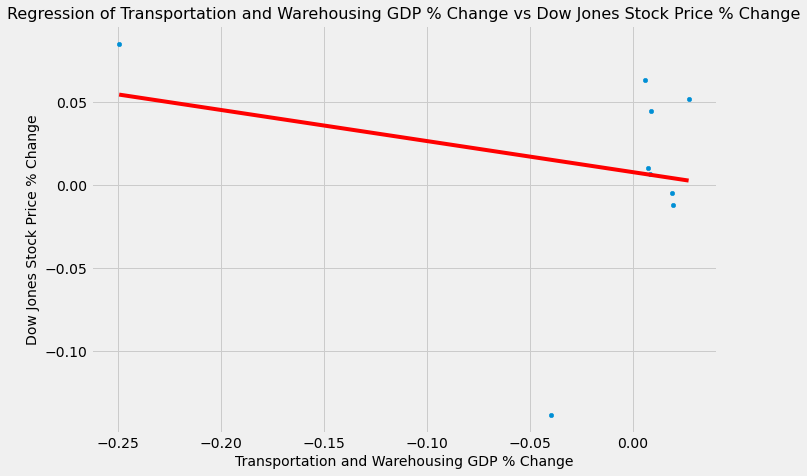

In [201]:
fig, ax = plt.subplots()

dj_gdp.plot.scatter(x='Transportationandwarehousing', y='Return', ax=ax)
dj_gdp.sort_values('Transportationandwarehousing').set_index('Transportationandwarehousing')['yhat_trans'].plot(color = 'red', linewidth=4, figsize=(10,7), ax=ax)

ax.set_title('Regression of Transportation and Warehousing GDP % Change vs Dow Jones Stock Price % Change', fontsize=16)
ax.set_ylabel('Dow Jones Stock Price % Change', fontsize=14)
ax.set_xlabel('Transportation and Warehousing GDP % Change', fontsize=14)

In [182]:
reg_gdp3.score(X = dj_gdp[['Transportationandwarehousing']], y = dj_gdp['Return'])

0.06308237534741967

#### Explanation and Analysis:

- Here, the regression graph shows us that there exists a slight negative relationship between the Transportation and Warehousing sector's GDP percent change and the Dow's stock price percent change. This means that as the transportation and warehousing sector's GDP increases, the Dow's stock prices would decrease. 


- The R^2 value in this case is 0.063, which means that only 6.3% of the variation in y can be explained by the model. This is not a reliable or fundamental indicator for determining stock market growth.

### 

In [203]:
reg_gdp4 = linreg().fit(dj_gdp[['Dataprocessing,internetpublishing,andotherinformationservices']], dj_gdp['Return'])
#Creating the regression function for the data processing sector's GDP percent change and the Dow's stock price percent change

In [204]:
dj_gdp['yhat_data'] = reg_gdp4.predict(dj_gdp[['Dataprocessing,internetpublishing,andotherinformationservices']])
#Creating the yhat line to be fit to the scatter plot

Text(0.5, 0, 'Data Processing GDP % Change')

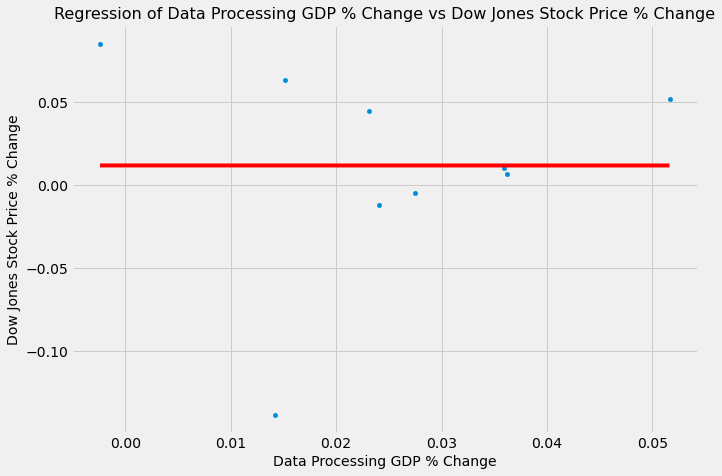

In [191]:
fig, ax = plt.subplots()

dj_gdp.plot.scatter(x='Dataprocessing,internetpublishing,andotherinformationservices', y='Return', ax=ax)
dj_gdp.sort_values('Dataprocessing,internetpublishing,andotherinformationservices').set_index('Dataprocessing,internetpublishing,andotherinformationservices')['yhat_data'].plot(color = 'red', linewidth=4, figsize=(10,7), ax=ax)

ax.set_title('Regression of Data Processing GDP % Change vs Dow Jones Stock Price % Change', fontsize=16)
ax.set_ylabel('Dow Jones Stock Price % Change', fontsize=14)
ax.set_xlabel('Data Processing GDP % Change', fontsize=14)

In [202]:
reg_gdp4.score(dj_gdp[['Dataprocessing,internetpublishing,andotherinformationservices']], dj_gdp['Return'])

1.0209375234104812e-08

#### Explanation and Analysis:

- Here, the graph shows us a completely flat regression line, which indicates absolutely zero relationship between the data processing sector's GDP percent change and the Dow's stock price percent change. This means that there is no predicting the Dow's stock prices when using the data processing sector's GDP data to predict it. 


- The R^2 value is extremely small, thus proving that this variable is not a reliable or fundamental indicator of stock market growth. 

### 

In [205]:
reg_gdp5 = linreg().fit(dj_gdp[['Financeandinsurance']], dj_gdp['Return'])
#Creating the regression function for the Finance and Insurance sector's GDP percent change and the Dow's stock price percent change

In [206]:
dj_gdp['yhat_finance'] = reg_gdp5.predict(dj_gdp[['Financeandinsurance']])
#Creating the yhat line to be fit on the scatter plot

Text(0.5, 0, 'Finance and Insurance GDP % Change')

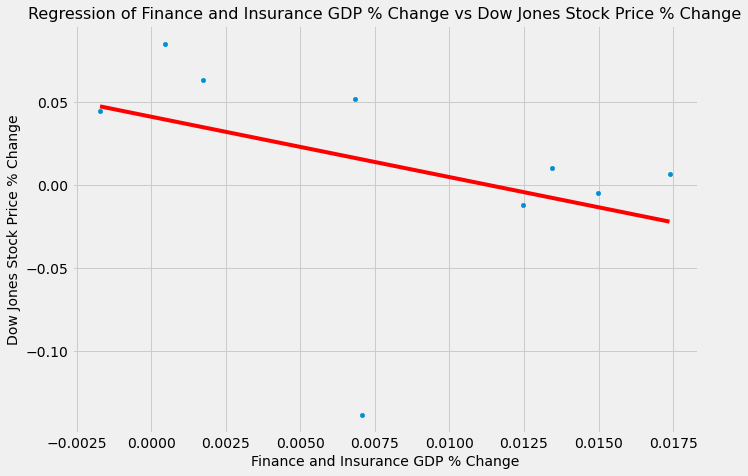

In [207]:
fig, ax = plt.subplots()

dj_gdp.plot.scatter(x='Financeandinsurance', y='Return', ax=ax)
dj_gdp.sort_values('Financeandinsurance').set_index('Financeandinsurance')['yhat_finance'].plot(color = 'red', linewidth=4, figsize=(10,7), ax=ax)

ax.set_title('Regression of Finance and Insurance GDP % Change vs Dow Jones Stock Price % Change', fontsize=16)
ax.set_ylabel('Dow Jones Stock Price % Change', fontsize=14)
ax.set_xlabel('Finance and Insurance GDP % Change', fontsize=14)

In [208]:
reg_gdp5.score(X=dj_gdp[['Financeandinsurance']], y=dj_gdp['Return'])

0.1468030800959117

#### Explanation and Analysis:

- Here, the regression graph shows us a negative relationhip between the Finance and Insurance sector's GDP percent change and the Dow's stock price percent change. This means that as the Finance and Insurance sector's GDP rises, the Dow's stock prices will fall.


- The R^2 value is the highest that we've seen in the analyses so far, at 0.1468. This means that 14.68% of the variation in y can be explained by the regression model. This could be because a good portion of the Dow's companies include ones from the finance and insurance sectors. Assuming that this downward, negative relationship cannot be rejected, this means that economical GDP (at least for this particular sector) and stock prices are inversely correlated. All of the other graphs also suggest this conclusion as well, but not to this degree. 